In [75]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

Text(0, 0.5, 'y')

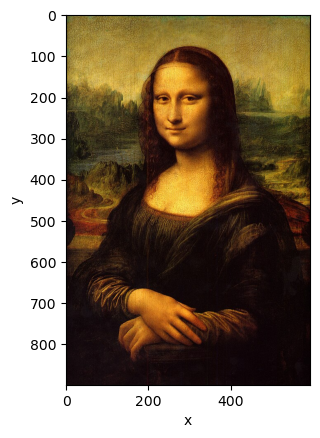

In [76]:
img = plt.imread('Mona_Lisa.jpg')
plt.imshow( img )
plt.gca().set_xlabel( 'x' )
plt.gca().set_ylabel( 'y' )

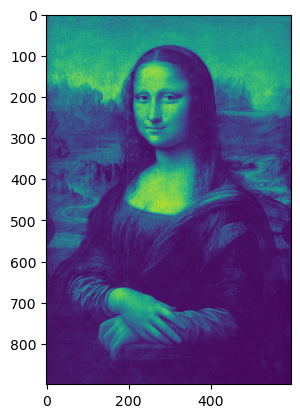

In [77]:
img_gray = img[:,:,0] * 0.2989 + img[:,:,1] * 0.5870 + img[:,:,2] * 0.1140
plt.imshow( img_gray )


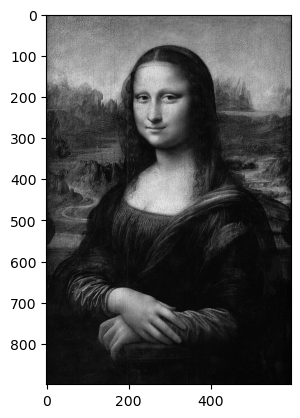

In [78]:
plt.imshow( img_gray, cmap='gray' )

In [79]:
shifts = range(-10, 11)
correlations = []
height, width,__ = img.shape


In [80]:
def shift_image(image, tx):
    shifted_img = np.zeros_like(image)
    if tx > 0:
        shifted_img[:, tx:] = image[:, :-tx]
    elif tx < 0:
        shifted_img[:, :tx] = image[:, -tx:]
    else:
        shifted_img = image
    return shifted_img


In [81]:
for tx in shifts:
    shifted_img = shift_image(img, tx)
    # Compute correlation coefficient
    corr, _ = pearsonr(img.flatten(), shifted_img.flatten())
    correlations.append(corr)
print(len(correlations))
print(len(shifts))

21
21


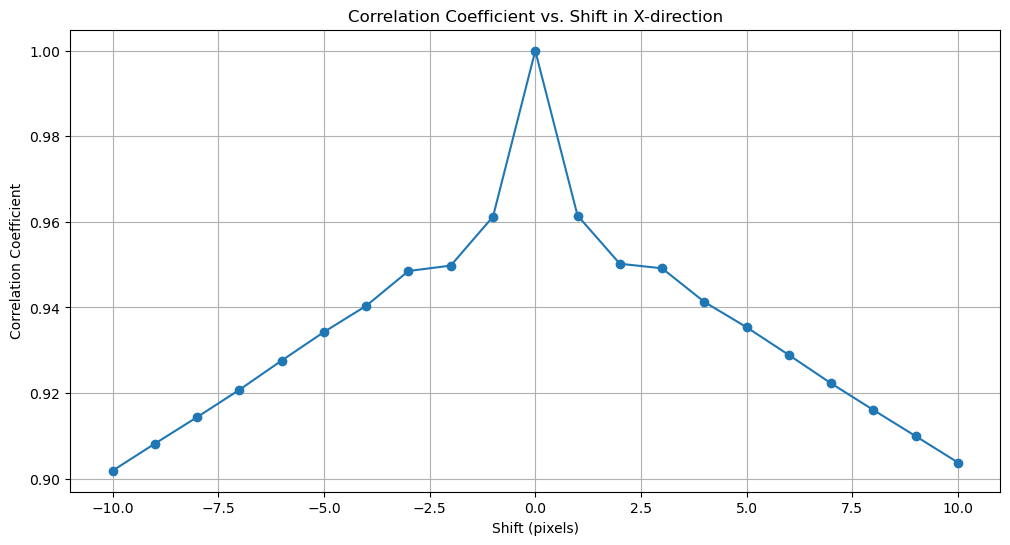

In [82]:
plt.figure(figsize=(12, 6))
plt.plot(shifts, correlations, marker='o')
plt.title('Correlation Coefficient vs. Shift in X-direction')
plt.xlabel('Shift (pixels)')
plt.ylabel('Correlation Coefficient')
plt.grid(True)
plt.show()

In [98]:
def compute_histogram(image):
    flat_img = image.flatten()
    hist = np.zeros(256)
    for pixel_value in flat_img:
        # print(pixel_value)
        hist[int(pixel_value )] += 1
    return hist

In [99]:
def compute_normalized_histogram(hist):
    total_pixels = np.sum(hist)
    return hist / total_pixels

In [100]:
hist = compute_histogram(img)
normalized_hist = compute_normalized_histogram(hist)

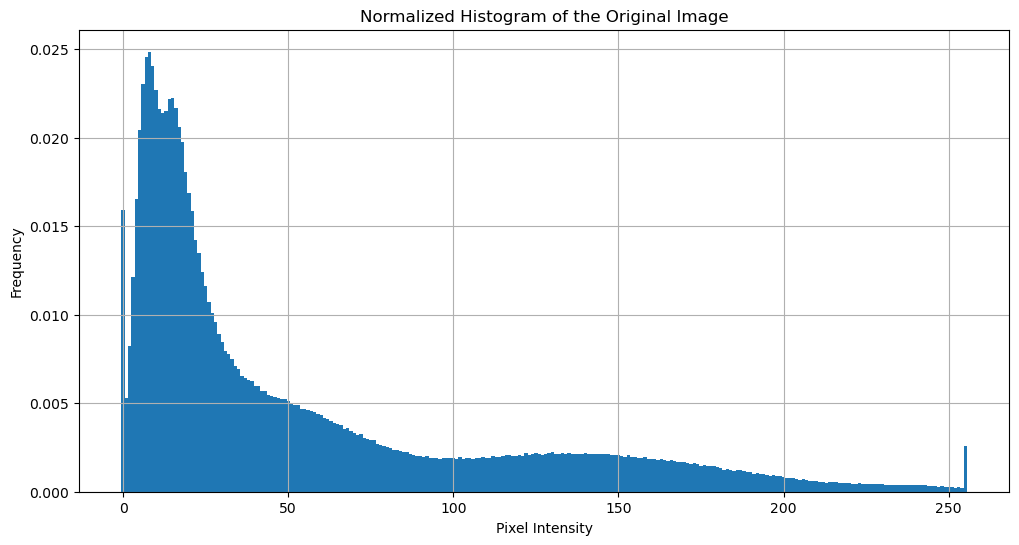

In [101]:
plt.figure(figsize=(12, 6))
plt.bar(range(256), normalized_hist, width=1.0)
plt.title('Normalized Histogram of the Original Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()